# GeoChem Exploration Data Analysis 

In [5]:
# Python modules
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# normality Test
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, pearsonr

from IPython.display import display
from ipywidgets import Checkbox, Dropdown 
import pandas as pd

from termcolor import colored, cprint

# IPython Widgets
from ipyfilechooser import FileChooser

## CSV Format

Delimiter must be ',', quote character must be "" and first column must containt field names

In [2]:
fc = FileChooser('.')
fc.title ='<b>Select csv geoChem table</b>'
fc.filter_pattern='*.csv'
fc.reset(path='.', filename= "RNGGeochem.csv")

display(fc)



FileChooser(path='D:\Users\gasato\anacondaProjects\GeoChem', filename='RNGGeochem.csv', title='<b>Select csv g…

In [3]:
print(fc.selected_filename)

RNGGeochem.csv


In [9]:
csvfile = open(fc.selected_filename)
csvReader = csv.DictReader(csvfile, delimiter=',', quotechar='"')
data = []
headers = csvReader.fieldnames
    
    #print(headers)
    
fieldNameMenu = Dropdown(options=headers, description='Column:')

box = Checkbox(False, description='Log10 (y/n)')

display(fieldNameMenu, box)
    


Dropdown(description='Column:', options=('OBJECTID', 'NUMERO_MUE', 'TIPO_MUEST', 'SYMBOL', 'Ag_ppm', 'Al_porci…

Checkbox(value=False, description='Log10 (y/n)')

In [12]:
# Check variables
fieldName=fieldNameMenu.value
print(fieldName, box.value)

Au_ppb True


In [13]:
for row in csvReader:
    #print(', '.join(row))
    data.append(row[fieldName])
    #print(row) #It not be used in order to avoid program crash

In [15]:
df = pd.Dataframe()

list

In [35]:
dataFiltered = []
for elem in np.array(data).astype(float):
    if elem > 0:
        dataFiltered.append(elem)
        
dataLog10 = np.log10(dataFiltered)

In [36]:
statsDict={'Data population': [dataLog10.size],
          'Min Value':[dataLog10.min()],
          'Max Value':[dataLog10.max()],
          'Mean Value':[dataLog10.mean()],
          'Standard Desviation':[dataLog10.std()],
          'Percentil 10%':[np.quantile(dataLog10, .10)],
          'Percentil 50%':[np.quantile(dataLog10, .50)],
          'Percentil 90%':[np.quantile(dataLog10, .90)]
}

df = pd.DataFrame(statsDict)

display(df)




,Data population,Min Value,Max Value,Mean Value,Standard Desviation,Percentil 10%,Percentil 50%,Percentil 90%
0,3153,0.792392,2.214844,1.466246,0.166195,1.232996,1.494155,1.634276


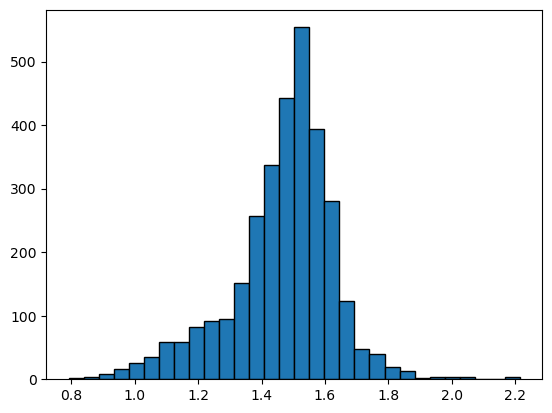

In [37]:
# Plot data

#fig, ax = plt.subplots(figsize=(16,8))

plt.hist(dataLog10, bins=30, edgecolor='black')
plt.show()



<AxesSubplot:ylabel='Density'>

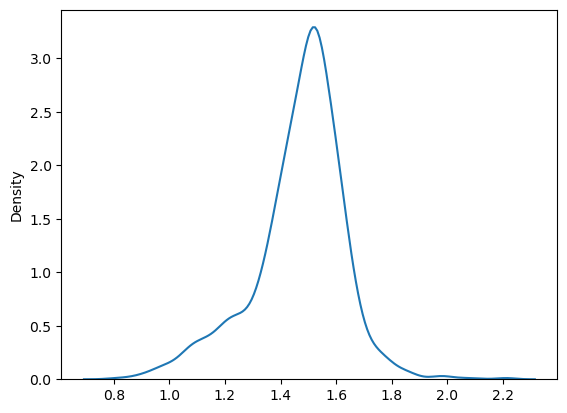

In [38]:
#Density plot

sns.kdeplot(dataLog10)


<AxesSubplot:>

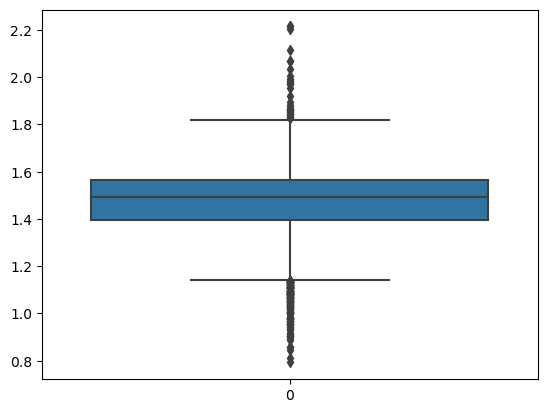

In [39]:


sns.boxplot(data=dataLog10, orient='H')

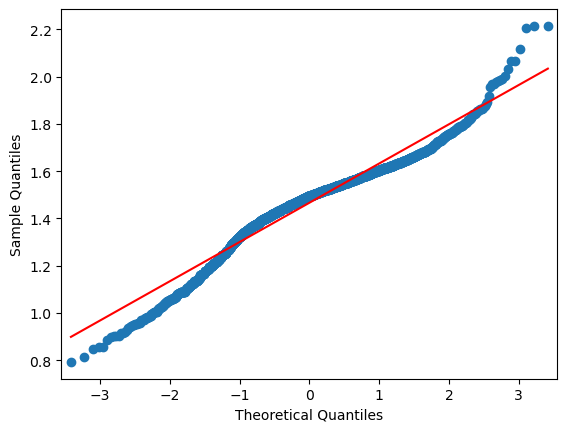

In [40]:
qqplot(dataLog10, line='s')
plt.show()

In [41]:
# normality test


'''
Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing 
it to critical values from the distribution of the test statistic.
p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

'''

stat, p = shapiro(dataLog10)

print('Estadístico=%.3f, p=%.3f' % (stat, p))

# interpret

alpha = 0.05

if p > alpha:
    cprint('Según Shapiro-Wilks la muestra parece tener distribución Gaussiana (NO se desecha la Hipótesis Nula)','red',  attrs=['bold'])
else:
    cprint('Según Shapiro-Wilk la muestra NO parece tener distribución Gaussiana (se desecha la Hipótesis Nula)','red',  attrs=['bold'])





Estadístico=0.953, p=0.000
Según Shapiro-Wilk la muestra NO parece tener distribución Gaussiana (se desecha la Hipótesis Nula)
